<br><div style= "background-color : darkblue; padding : 16pt; font-size: 24pt; font-family: sans-serif bold; font-weight: bold; color: white;">FoodHub Data Analysis (Python Foundations)</div><br>

## **Context**
---

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

<br>

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

## **Objective**
---

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. **Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.**

## **Data Description**
---

The data contains the different data related to a food order. The detailed data dictionary is given below.

### **Data Dictionary**

- **order_id** : Unique ID of the order<p>
- **customer_id** : ID of the customer who ordered the food<p>
- **restaurant_name** : Name of the restaurant<p>
- **cuisine_type** : Cuisine ordered by the customer<p>
- **cost** : Cost of the order<p>
- **day_of_the_week** : Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)<p>
- **rating** : Rating given by the customer out of 5<p>
- **food_preparation_time** : Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation<p>
- **delivery_time** : Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information<p>

## **Import Libraries**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import builtins
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment=None
import warnings
warnings.filterwarnings("ignore")

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
font=FontProperties()
font.set_name("Arial")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import matplotlib.lines as mlines

In [2]:
th_props = [
    ("background-color", "darkslategrey"),
    ("color", "white"),
    ("border", "1px solid lightgray"),
    ("fontfamily", "roboto"),
    ("font-size", "12pt"),
    ("text-align", "left"),
    ("vertical-align", "top"),
  ]

td_props = [
    ("color", "black"),
    ("border", "1px solid lightgray"),
    ("fontfamily", "roboto"),
    ("font-size", "12pt"),
    ("text-align", "left"),
    ("vertical-align", "top"),
]

s = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

## **Explore Dataset**

In [3]:
# Read and View first 5 rows of the dataset
df=pd.read_csv("foodhub_order.csv").sort_values(by=["order_id"], ascending=True).reset_index(drop=True)
df.head().style.set_table_styles(s)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1476547,83095,Bareburger,American,6.840000,Weekend,5,22,24
1,1476548,122609,Blue Ribbon Sushi,Japanese,6.840000,Weekend,4,20,30
2,1476549,75169,Tamarind TriBeCa,Indian,6.740000,Weekend,5,25,26
3,1476550,101347,The Loop,Japanese,16.980000,Weekend,5,26,27
4,1476551,49034,The Smile,American,12.180000,Weekend,Not given,22,27


In [4]:
# View the last 5 rows of the dataset
df.tail().style.set_table_styles(s)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1478440,231042,Momoya,Japanese,12.130000,Weekend,5,22,21
1894,1478441,228541,RedFarm Hudson,Chinese,29.100000,Weekend,Not given,27,28
1895,1478442,378035,Five Guys Burgers and Fries,American,29.730000,Weekend,5,21,25
1896,1478443,96943,Cafe Mogador,Middle Eastern,29.880000,Weekend,4,20,17
1897,1478444,355090,Shake Shack,American,31.430000,Weekend,3,22,24


In [5]:
# View random samples of the dataset
df.sample(n=10, random_state=1).style.set_table_styles(s)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
654,1477201,332635,TAO,Japanese,16.050000,Weekend,4,23,20
759,1477306,94691,brgr,American,5.720000,Weekday,3,24,26
1406,1477953,39334,The Meatball Shop,American,19.350000,Weekend,4,31,25
1737,1478284,139885,Blue Ribbon Fried Chicken,American,8.200000,Weekend,5,34,17
1787,1478334,352247,Chipotle Mexican Grill $1.99 Delivery,Mexican,25.220000,Weekend,4,27,22
1082,1477629,198936,Five Leaves,American,12.130000,Weekend,Not given,23,15
1630,1478177,80683,Blue Ribbon Sushi,Japanese,11.590000,Weekend,4,22,18
1483,1478030,131093,Bareburger,American,13.770000,Weekend,3,33,29
231,1476778,276192,Sushi of Gari Tribeca,Japanese,31.330000,Weekday,Not given,34,26
705,1477252,96262,Cafe Habana,Mexican,8.100000,Weekend,Not given,20,16


<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 1 : How many rows and columns are present in the data? </strong></span>

In [6]:
# View no. of rows and columns in the dataset
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns")

The dataset has 1898 rows and 9 columns


In [7]:
# View list of columns in the dataset
col=df.columns.tolist()
print("The dataset has columns:", col)

The dataset has columns: ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']


<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 2 : What are the datatypes of the different columns in the dataset? </strong></span>

In [8]:
# View datatypes 
df_dt=df.dtypes.to_frame().reset_index()
df_dt.columns=["Column", "DataType"]
df_dt.style.set_table_styles(s)

,Column,DataType
0,order_id,int64
1,customer_id,int64
2,restaurant_name,object
3,cuisine_type,object
4,cost_of_the_order,float64
5,day_of_the_week,object
6,rating,object
7,food_preparation_time,int64
8,delivery_time,int64


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 14pt; color: white;">Observations</span><p>

- The dataset has 1898 rows and 9 columns.
- The columns are [order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time].
- Of the 9 columns, 4 of them are integers (order_id, customer_id, food_preparation_time, delivery_time), 4 are objects/strings (restaurant_name, cuisine_type, day_of_the_week, rating) and 1 is a float (cost_of_the_order).
- The rating variable should be of numeric datatype.
- The order_id and customer_id are nominal variables/unique identifiers and do not provide any meaningful or quantitative information.


<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 3 : Are there any missing values in the data? If yes, treat them using an appropriate method.</strong></span>

In [9]:
# Count no. of missing values for each column
df_na=df.isnull().sum().to_frame().reset_index()
df_na.columns=["Column", "Missing Value Count"]
display(df_na.style.set_table_styles(s))

,Column,Missing Value Count
0,order_id,0
1,customer_id,0
2,restaurant_name,0
3,cuisine_type,0
4,cost_of_the_order,0
5,day_of_the_week,0
6,rating,0
7,food_preparation_time,0
8,delivery_time,0


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 14pt; color: white;">Observations</span><p>

- Based on preliminary analysis, there seems to be no missing value. We will further explore the unique values for each of the columns.

In [10]:
for col in df.select_dtypes(include=["object"]).columns:
    df_unique_list=df[col].unique().tolist()
    df_unique=pd.DataFrame(df_unique_list, columns=[f"Unique {col}"])
    display(df_unique.style.set_table_styles(s))

,Unique restaurant_name
0,Bareburger
1,Blue Ribbon Sushi
2,Tamarind TriBeCa
3,The Loop
4,The Smile
5,Melt Shop
6,Osteria Morini
7,Shake Shack
8,Blue Ribbon Sushi Bar & Grill
9,ilili Restaurant


,Unique cuisine_type
0,American
1,Japanese
2,Indian
3,Italian
4,Middle Eastern
5,Mediterranean
6,Mexican
7,Chinese
8,Southern
9,Thai


,Unique day_of_the_week
0,Weekend
1,Weekday


,Unique rating
0,5
1,4
2,Not given
3,3


In [11]:
num_col=df.select_dtypes(include=["int", "float"]).columns
df[num_col].describe().style.set_table_styles(s)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1477495.500000,171168.478398,16.498851,27.371970,24.161749
std,548.049724,113698.139743,7.483812,4.632481,4.972637
min,1476547.000000,1311.000000,4.470000,20.000000,15.000000
25%,1477021.250000,77787.750000,12.080000,23.000000,20.000000
50%,1477495.500000,128600.000000,14.140000,27.000000,25.000000
75%,1477969.750000,270525.000000,22.297500,31.000000,28.000000
max,1478444.000000,405334.000000,35.410000,35.000000,33.000000


In [12]:
# Retrieve, sort and check if there is missing order id in the dataset
orderid_list=sorted(df["order_id"].values.tolist())
print("First order_id. :", orderid_list[0])
print("Last order_id. :", orderid_list[-1])
print("Total count of order_id: ", len(orderid_list))

#  check for missing order_id
def missing(n):
    output=[]
    for i in range(min(orderid_list), max(orderid_list) + 1):
        if i not in n:
            output.append(i)
    return output

print("Missing order_id :", missing(orderid_list))

First order_id. : 1476547
Last order_id. : 1478444
Total count of order_id:  1898
Missing order_id : []


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 14pt; color: white;">Observations</span><p>

- The dataset contains 1898 orders and the order_id is ranged between 1476547 and 1478444 (no missing Order ID).
- There is no missing value for all the columns. However, the dataset comprises of 588 orders with a rating of 5, 366 orders with a rating of 4 and 188 orders with a rating of 3. In additional, there are 736 unrated orders, with customer rating indicated as 'Not given'. These unrated orders will be treated as missing customer rating and should be converted to NaN. The data type for rating should also be changed to numeric to facilitate downstream analytical tasks.
- The range of values for cost_of_the_order is between 4.47 and 35.41 dollars.
- The range of values for food_preparation_time is between 20 and 35 mins.
- The range of values for delivery_time is between 15 and 33 mins.


In [13]:
# Create a copy of the dataset
df1 = df.copy()

### **Missing Value Imputation**

**Missing values** refers to the **absence of data or information for specific variables or observations within a dataset**. Their significance lies in their potential to **compromise data quality and integrity**. Incomplete data can lead to undesirable consequences, including the potential for **inaccurate and biased analyses**, which, in turn, can **undermine the reliability of data-driven decision-making**. In certain scenarios, they may even lead to **ethical issues such as discrimination** or **non-compliance, potentially resulting in legal repercussions**. Missing data **often carries valuable information**, and it can result in a **loss of insights and patterns** if not handled properly. Moreover, the **accuracy and performance of predictive machine learning models can also be affected** by the presence of missing values.<br><br>

In [14]:
'''
Alternative methods to update "Not given" with NaN
- df.loc[df.rating=="Not given", "rating"]=np.nan
- df["rating"]=df["rating"].apply(lambda x : np.nan if x=="Not given" else x)
'''

# Replace 'Not given' with NaN in the initial dataframe
df1["rating"].replace("Not given", np.nan, inplace=True)
df1.head(10).style.set_table_styles(s).highlight_null(props="font-weight : bold; background-color : yellow")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1476547,83095,Bareburger,American,6.840000,Weekend,5,22,24
1,1476548,122609,Blue Ribbon Sushi,Japanese,6.840000,Weekend,4,20,30
2,1476549,75169,Tamarind TriBeCa,Indian,6.740000,Weekend,5,25,26
3,1476550,101347,The Loop,Japanese,16.980000,Weekend,5,26,27
4,1476551,49034,The Smile,American,12.180000,Weekend,nan,22,27
5,1476552,334758,Melt Shop,American,12.560000,Weekend,4,25,23
6,1476553,128224,Osteria Morini,Italian,9.170000,Weekend,nan,25,22
7,1476554,368663,Shake Shack,American,9.120000,Weekend,nan,31,19
8,1476555,97991,Blue Ribbon Sushi Bar & Grill,Japanese,9.650000,Weekend,nan,25,26
9,1476556,301380,ilili Restaurant,Middle Eastern,16.300000,Weekend,4,27,16


In [15]:
# Change datatype for rating to numeric
print("Datatype for rating before conversion :", df1["rating"].dtypes)
df1["rating"] = df1["rating"].astype("float")
print("Datatype for rating after conversion :", df1["rating"].dtypes)

Datatype for rating before conversion : object
Datatype for rating after conversion : float64


#### **Using missingno to visualize the distribution of missing values**

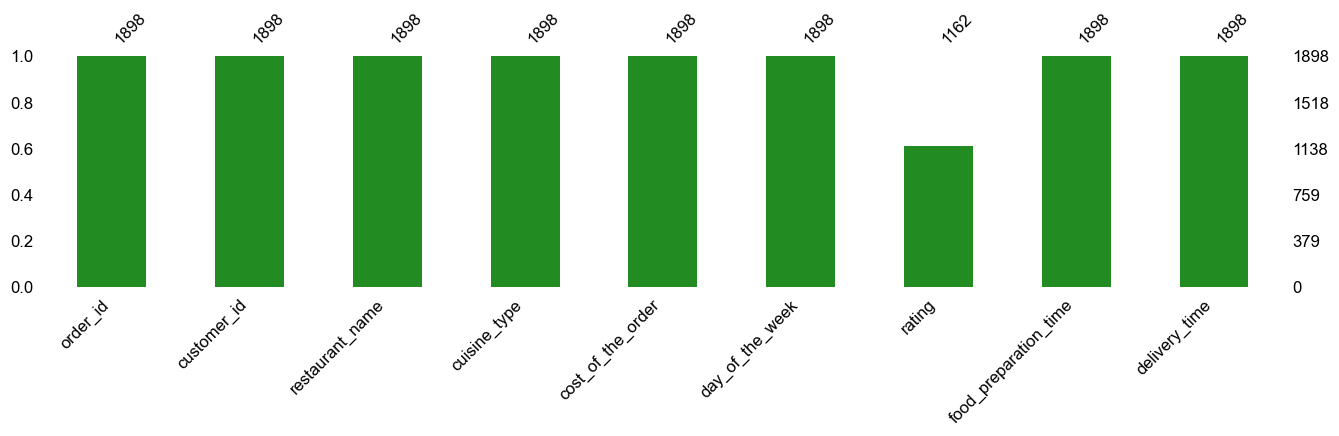

In [16]:
# Import missingno 
import missingno as msno

# Barplot 
msno.bar(df1, figsize=(16, 3), color="forestgreen",  fontsize=12)
plt.show()

In [17]:
# Create a function to sort dataset by column and plot msno.matrix()
def visualize_missingness_by_column(df):
    for col in df.columns:
        # Sort dataframe by the column
        df_sorted=df.sort_values(by=col)
        
        # Plot the missing values using msno.matrix()
        msno.matrix(df_sorted,  figsize=(16, 4), fontsize=10)
        plt.title(f"Missingness Sorted by {col}", fontsize=14, fontweight=700)

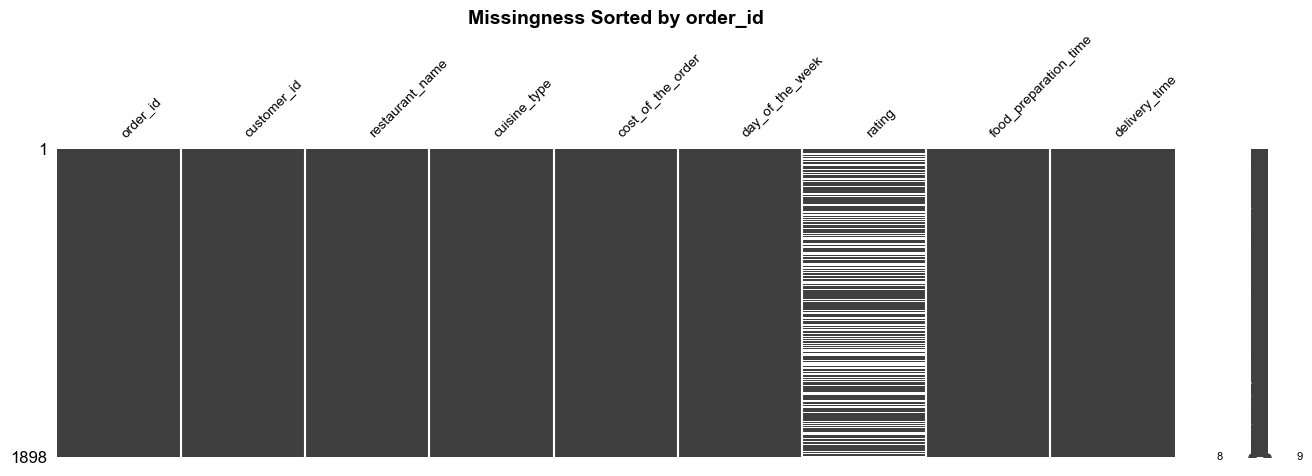

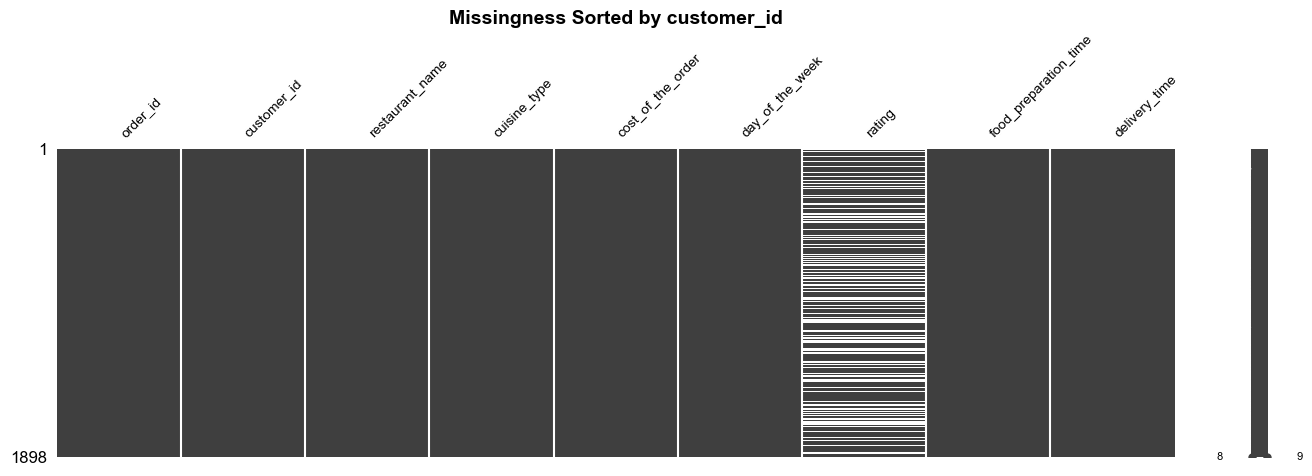

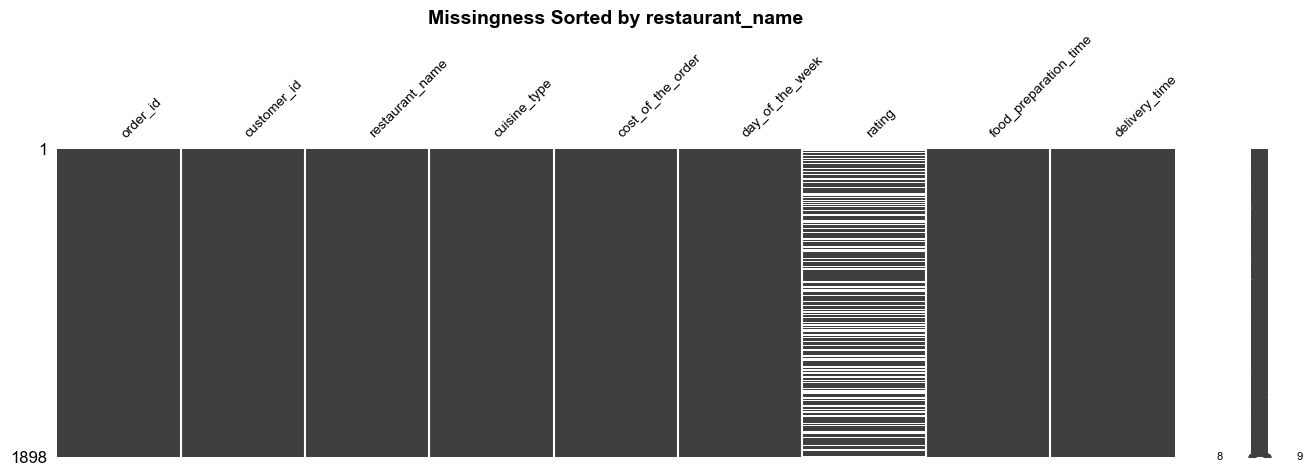

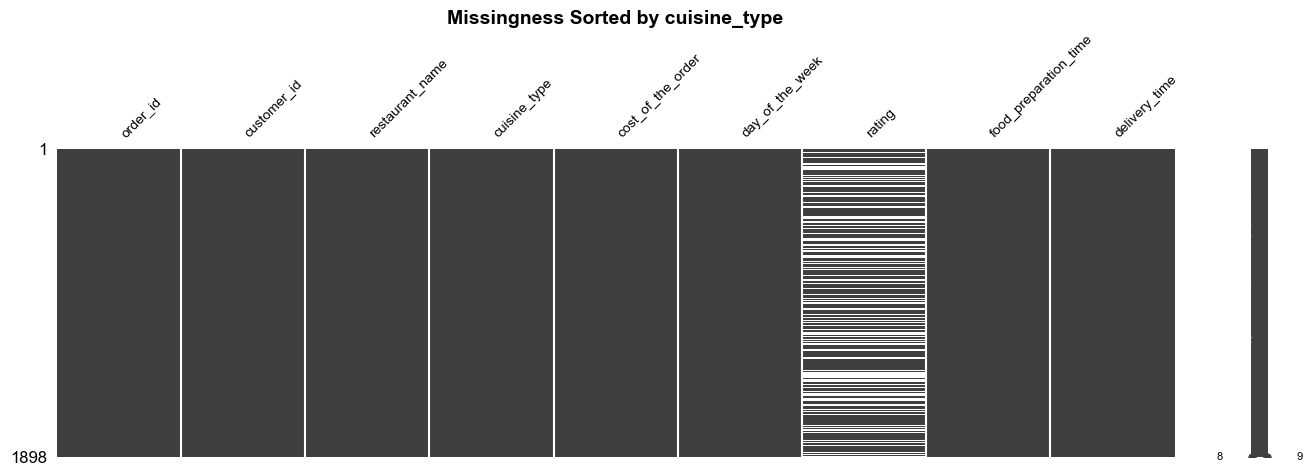

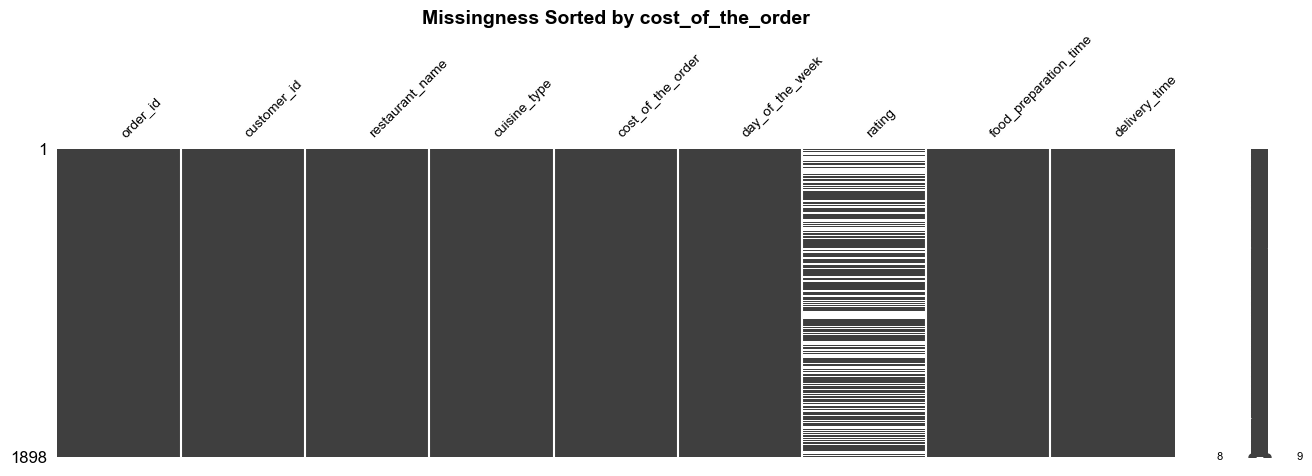

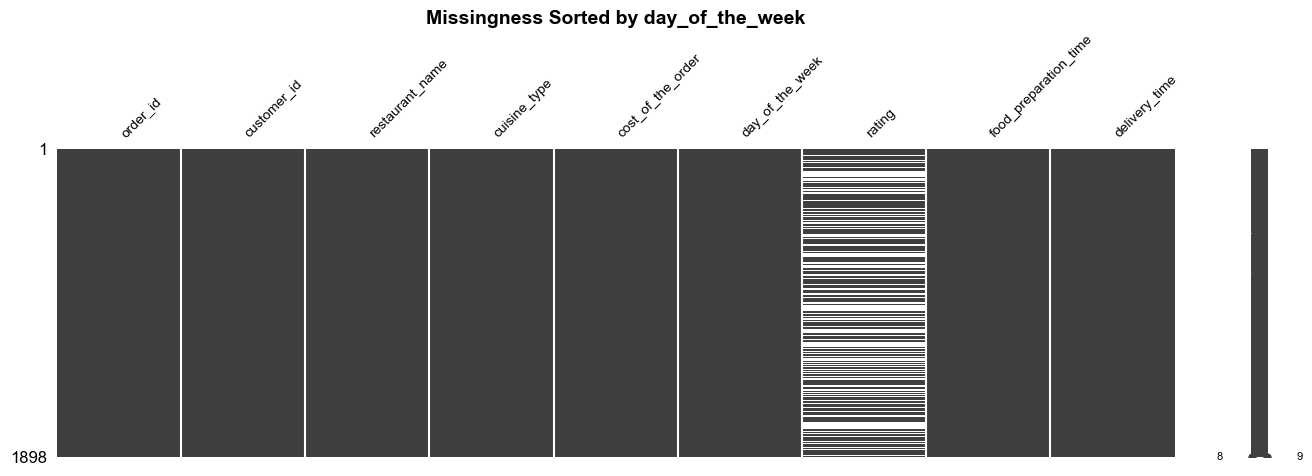

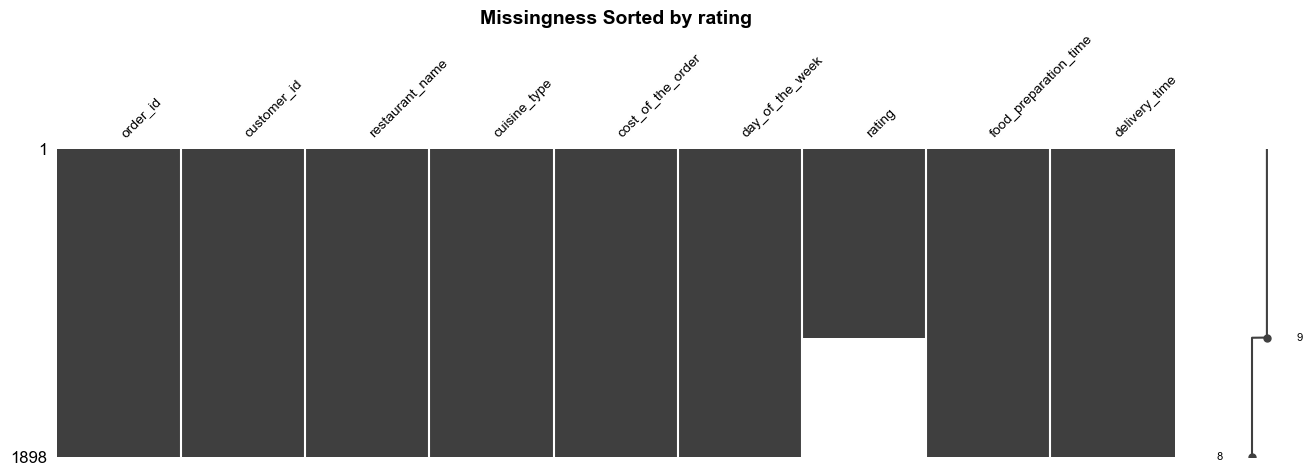

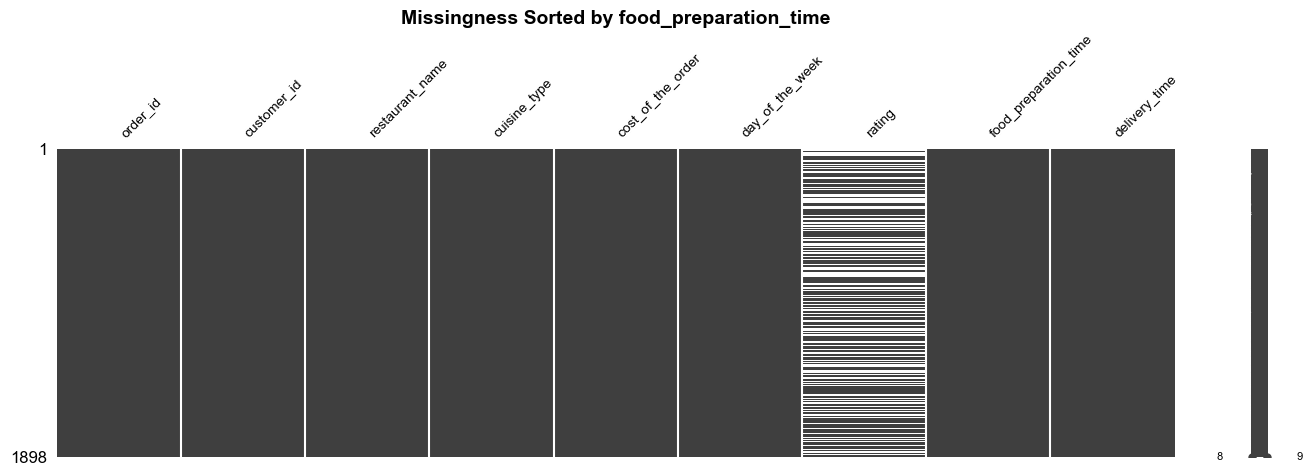

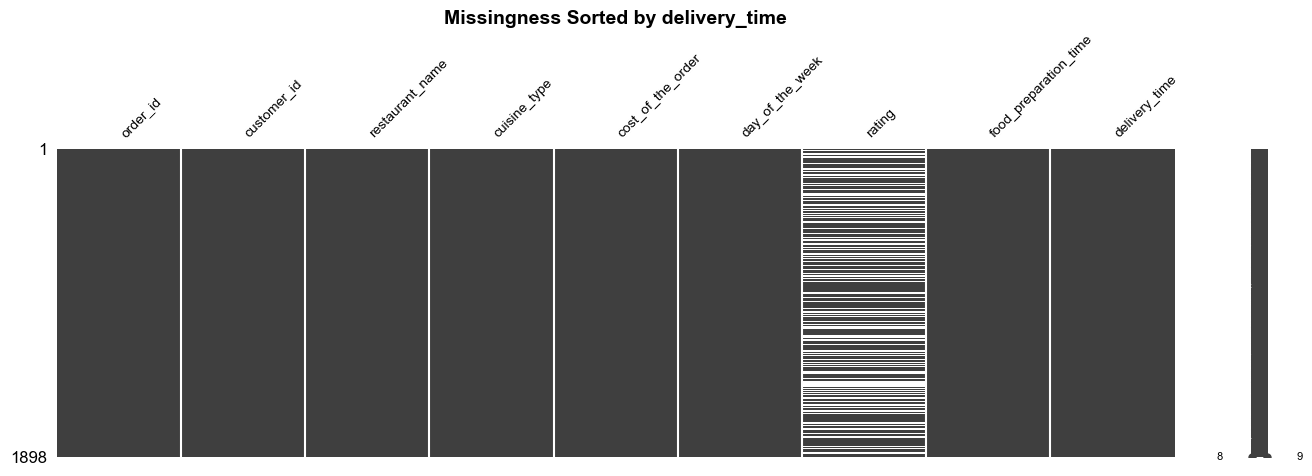

In [18]:
visualize_missingness_by_column(df1)

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 14pt; color: white;">Observations</span><p>
    
- The missing values for "rating" are likely to be Missing Completely At Random (MCAR) as the missing values are randomly distributed in all the matrix plots.

In [19]:
# Create a function to plot histogram for continuous variable
def create_boxhistplot(data, col, y_height):
    # Compute mean and median values
    mean_val = data[col].mean()
    median_val = data[col].median()
    
    # Create a figure with two subplots with shared x-axis and specified height ratios
    fig, ax = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, figsize=(9, 5))
    
    # Create boxplot
    sns.boxplot(data=data, x=col, linewidth=2, width=0.5, color="lightblue", showmeans=True, ax=ax[0])
    
    # Create histplot with kde line 
    sns.histplot(data=data, x=col, stat="density", color="lightgreen", edgecolor="limegreen", linewidth=1.5, ax=ax[1])
    sns.kdeplot(data=data, x=col, linewidth=3, color="darkgreen", ax=ax[1])
    
    # Customize plots
    ax[0].set_title(f'Distribution of {col}\n', fontsize=13, fontweight='bold')
    ax[0].tick_params(bottom=False) 
    ax[0].set_yticks([])
    ax[1].set_xlabel(f'\n{col}', fontsize=11, fontweight='bold')
    ax[1].set_ylabel('')
    ax[1].set_yticks([])
    
    # Add mean and median lines and text annotations to histogram
    ax[1].axvline(x=mean_val, color='red', linewidth=2.5, linestyle="--")
    ax[1].text(mean_val, y_height, f"{mean_val:.2f}", color="red", fontsize=12, weight="bold", ha='right', va='bottom', rotation=90)
    ax[1].axvline(x=median_val, color='blue', linewidth=2.5, linestyle=":")
    ax[1].text(median_val, y_height, f"{median_val:.2f}", color="blue", fontsize=12, weight="bold", ha='right', va='bottom', rotation=90)
    
    # Setting x-ticks for the histogram
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(nbins='auto')) 
    ax[1].tick_params(axis='x', which='major', labelsize=10)
    
    # Hide the spines for a cleaner look
    ax[0].spines[["top", "right", "bottom", "left"]].set_visible(False)
    ax[1].spines[["top", "right", "left"]].set_visible(False)
    
    # Create a legend for the mean and median lines
    mean_legend = mlines.Line2D([], [], color='red', linestyle='--', linewidth=2.5, label='Mean')
    median_legend = mlines.Line2D([], [], color='blue', linestyle=':', linewidth=2.5, label='Median')
    ax[1].legend(handles=[mean_legend, median_legend], loc='best')
    
    plt.tight_layout()
    plt.show()

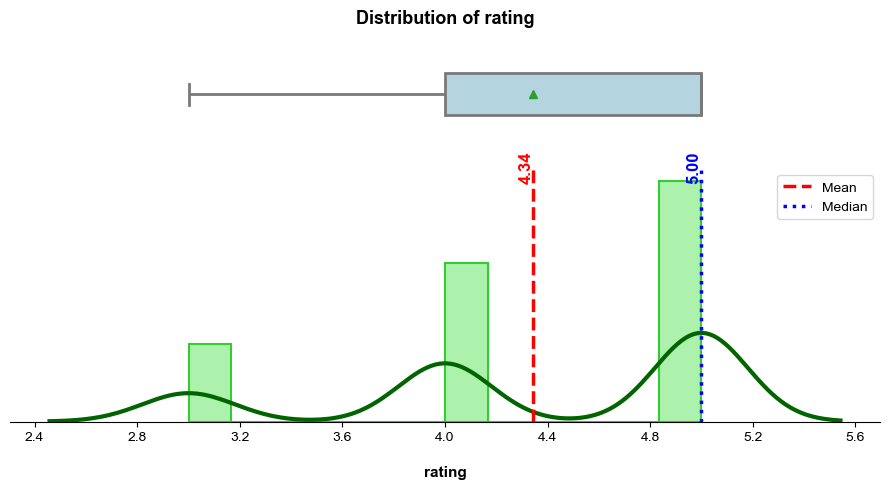

In [20]:
create_boxhistplot(df1, "rating", y_height=3.0)

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 14pt; color: white;">Observations</span><p>
    
- The most frequent rating (mode) and the median are both at the maximum of the scale, which is 5. This indicates that most customers are giving the highest rating.
- Since the missingness for rating is MCAR, the most straightforward method to fill the missing values is either median or mode imputation as they would not be dependent on any other variables and are likely to maintain the central tendency of the data.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 4 : Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?</strong></span>

In [21]:
# View basic statistical summary of the data
df1.describe().style.set_table_styles(s)

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1477495.500000,171168.478398,16.498851,4.344234,27.371970,24.161749
std,548.049724,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1476547.000000,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1477021.250000,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1477495.500000,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1477969.750000,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1478444.000000,405334.000000,35.410000,5.000000,35.000000,33.000000


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The dataset has 1898 observations.
- 25% of the observations has no rating, cost 12.08 or below, takes 23 mins or below to prepare and 20 mins or below to deliver.
- 50% of the observations with rating 4 or below, cost 14.14 or below, takes 27 mins or below to prepare and 25 mins or below to deliver.
- 75% of the observations with rating 5 or below, cost 22.29 or below, takes 31 mins or below to prepare and 28 mins or below to deliver.
- Maximum rating, cost, preparation and delivery time are 5, 35.41, 35 mins and 33 mins repsectively.
- The average, minimum and maximum food preparation time are 27.37, 20 and 35 mins respectively.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 5 : How many orders are not rated?</strong></span>

In [22]:
# Create a function to plot distribution for categorical variable 
def create_barplot(df, col, fs=(9, 3)):
    # Check the distribution for col
    col_count = df[col].value_counts(dropna=False)
    col_percent = (col_count * 100 / len(df)).map("{:.2f}%".format)
    df_col = pd.concat([col_count, col_percent], axis=1, keys=["Count", "Percent"]).reset_index()
    df_col = df_col.sort_values(by="Count", ascending=False)

    # Function to add value labels
    def addlabels(x, y, percentages):
        for i in range(len(x)):
            label = f"{y[i]}\n({percentages[i]})"
            plt.text(i, y[i] + 20, label, fontsize=12, fontweight=700, ha='center', bbox=dict(facecolor='white', alpha=0.8))

    # Visualize the distribution for col
    plt.figure(figsize=fs)
    col_count.plot(kind="bar", width=0.8, color="limegreen", edgecolor="darkgreen", linewidth=1.5)
    col_value = col_count.index.tolist()
    col_percent_values = df_col["Percent"].tolist()

    # Customise the plot
    addlabels(col_value, col_count.values, col_percent_values)
    plt.title(f'Distribution of {col}\n\n', fontsize=13, fontweight=600)
    plt.xlabel(f'\n{col}', fontsize=11, fontweight=600)
    plt.xticks(rotation=0)
    plt.ylabel('Count\n', fontsize=11, fontweight=600)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

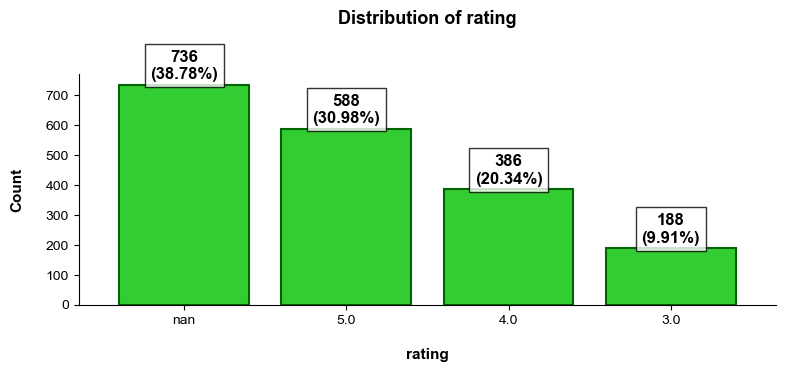

In [23]:
# View distribution for rating
create_barplot(df1, "rating")

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- Follow on from Question 3, the number of unrated orders is 736 and they will be imputed with either the mode or median.

In [24]:
# Impute the missing values for rating
df1["rating"].fillna(df1["rating"].median(), inplace=True)
df1.head(10).style.set_table_styles(s)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1476547,83095,Bareburger,American,6.840000,Weekend,5.000000,22,24
1,1476548,122609,Blue Ribbon Sushi,Japanese,6.840000,Weekend,4.000000,20,30
2,1476549,75169,Tamarind TriBeCa,Indian,6.740000,Weekend,5.000000,25,26
3,1476550,101347,The Loop,Japanese,16.980000,Weekend,5.000000,26,27
4,1476551,49034,The Smile,American,12.180000,Weekend,5.000000,22,27
5,1476552,334758,Melt Shop,American,12.560000,Weekend,4.000000,25,23
6,1476553,128224,Osteria Morini,Italian,9.170000,Weekend,5.000000,25,22
7,1476554,368663,Shake Shack,American,9.120000,Weekend,5.000000,31,19
8,1476555,97991,Blue Ribbon Sushi Bar & Grill,Japanese,9.650000,Weekend,5.000000,25,26
9,1476556,301380,ilili Restaurant,Middle Eastern,16.300000,Weekend,4.000000,27,16


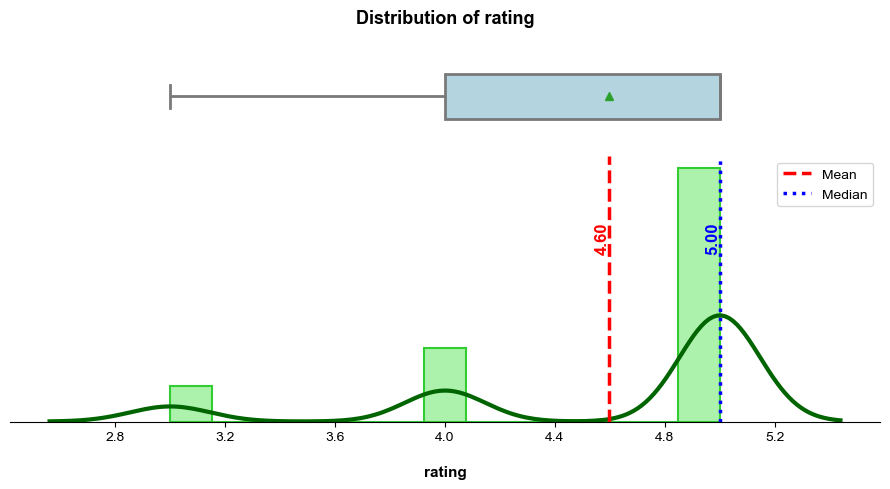

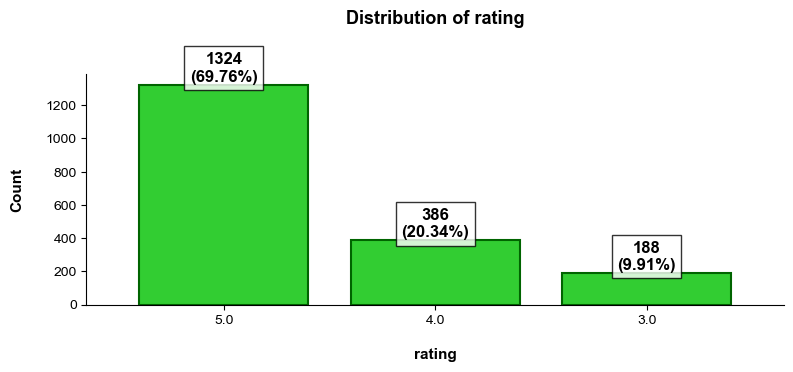

In [25]:
# View distribution for rating
create_boxhistplot(df1, "rating", y_height=3.0)
create_barplot(df1, "rating")

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- With the missing value imputation, the mean rating has increased from 4.34 to 4.60. The median rating remains as 5.0.

## **Univariate Analysis**

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 6 : Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration).</strong></span>

In [26]:
# View the cat class distribution 
def univariate_countplot(df, col, fs=(8, 4)):
    cat_count = df[col].value_counts()
    cat_count_df = pd.DataFrame(cat_count).reset_index()
    cat_count_df.columns = [f"{col}", "count"]
    cat_count_df['% count'] = ((cat_count_df['count'] * 100) / cat_count_df['count'].sum()).round(2).astype(str) + '%'
    display(cat_count_df.style.set_table_styles(s))
    create_barplot(df, col, fs)

In [27]:
# List of categorical variables
cat_cols = df1.select_dtypes(include=["object"]).columns.tolist()
print(f"The categorical columns are :\n{cat_cols}")

The categorical columns are :
['restaurant_name', 'cuisine_type', 'day_of_the_week']


,cuisine_type,count,% count
0,American,584,30.77%
1,Japanese,470,24.76%
2,Italian,298,15.7%
3,Chinese,215,11.33%
4,Mexican,77,4.06%
5,Indian,73,3.85%
6,Middle Eastern,49,2.58%
7,Mediterranean,46,2.42%
8,Thai,19,1.0%
9,French,18,0.95%


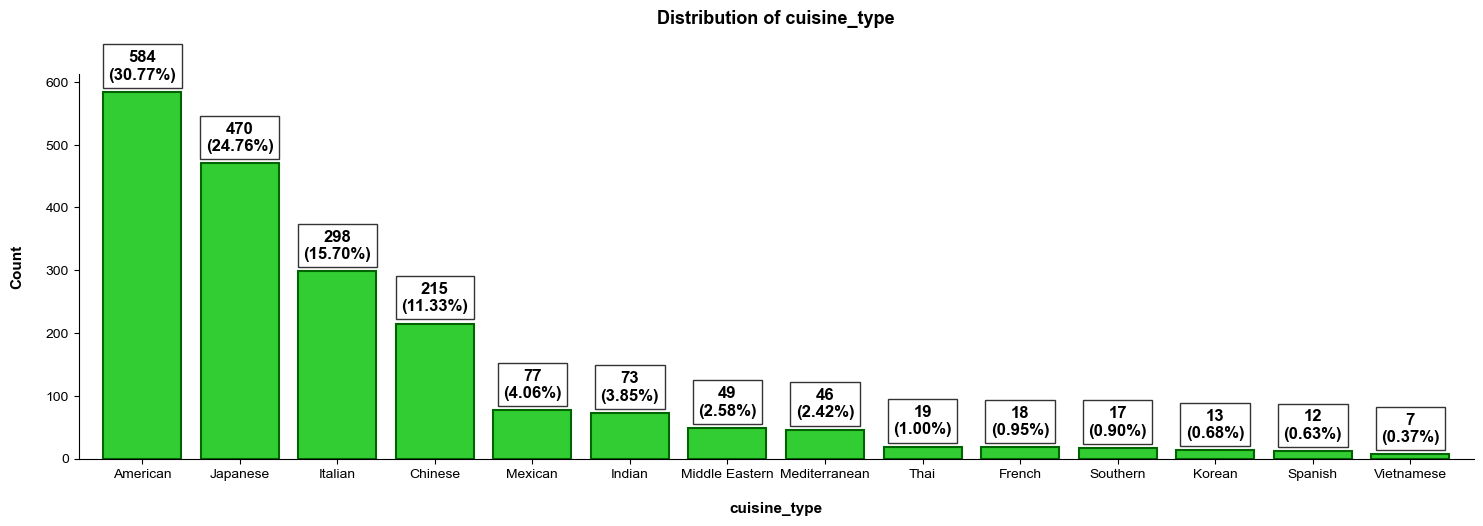

In [28]:
# View distribution for cuisine_type
univariate_countplot(df1, "cuisine_type", fs=(18, 5))

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- With a total of 584 orders (30.8%), American is the most popular cuisine.
- Japanese and Italian ranked second and third, with a total order count of 470 (24.8%) and 298 (15.7%) respectively.

,day_of_the_week,count,% count
0,Weekend,1351,71.18%
1,Weekday,547,28.82%


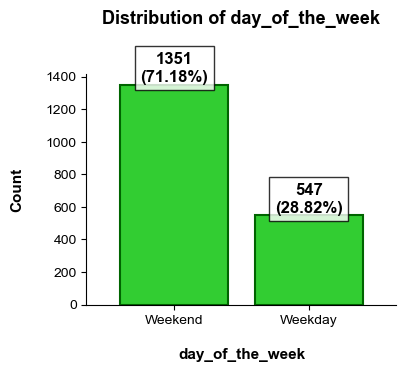

In [29]:
# View distribution for day_of_the_week
univariate_countplot(df1, "day_of_the_week", fs=(4, 3))

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- There are more food orders made during the weekends (71%) than during the weekends (29%).

In [30]:
# List of numerical variables
num_cols = df1.select_dtypes(include=["int", "float"]).columns.tolist()
print(f"The numerical columns are :\n{num_cols}")

The numerical columns are :
['order_id', 'customer_id', 'cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']


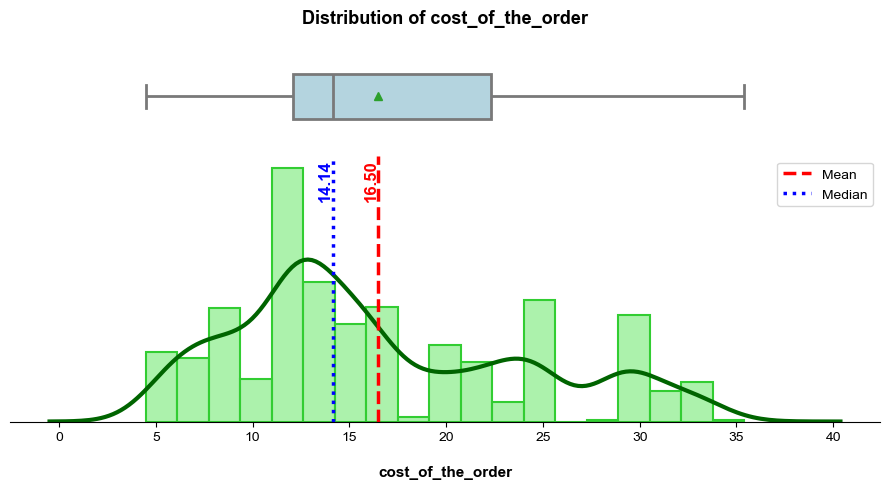

In [31]:
# View distribution for cost_of_the_order
create_boxhistplot(df1, "cost_of_the_order", y_height=0.1)

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- Both histplot and boxplot show a right/ positively skewed distribution i.e. towards lower costs.
- The mean and median cost are 16.50 and 14.14 respectively.
- The hisplot shows more than one peak - the highest being around 13 and two slight peaks at around 24 and 30. The students are likely to be the reason behind the highest peak (on the left) and the working professionals (having higher spending power) are probably the cause for the two peaks on the right.

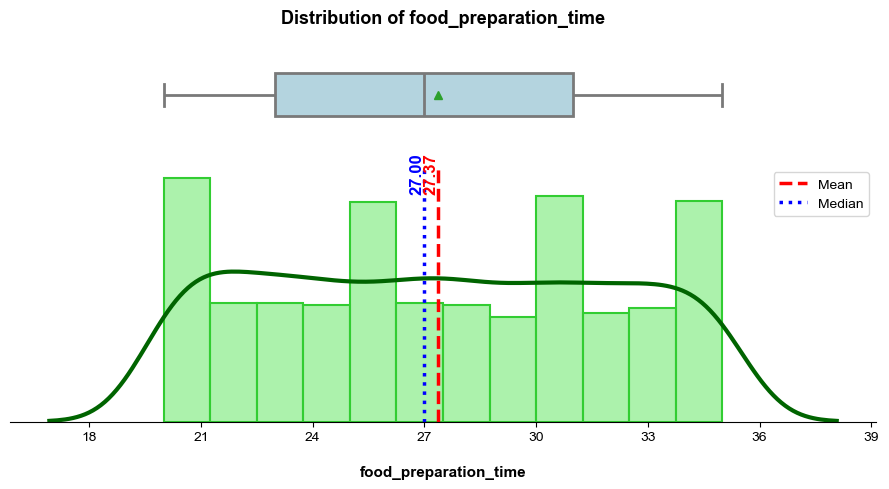

In [32]:
# View distribution for cost_of_the_order
create_boxhistplot(df1, "food_preparation_time", y_height=0.1)

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- Food preparation time is evenly distributed between 20 and 36 minutes, with a mean and median of 27.37 mins and 27 mins respectively.

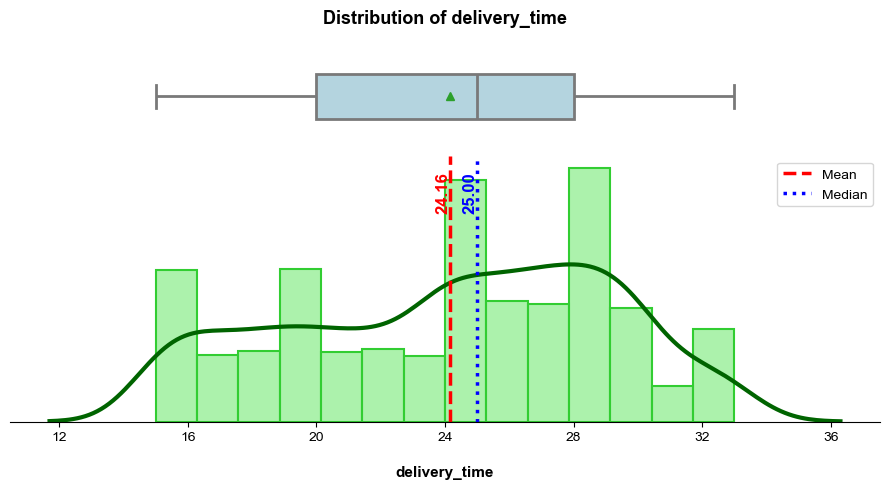

In [33]:
# View distribution for delivery_time
create_boxhistplot(df1, "delivery_time", y_height=0.1)

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- Delivery time is slightly skewed to the left with a mean and median delivery time of 24.16 mins and 25 mins respectively.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 7 : Which are the top 5 restaurants in terms of the number of orders received?</strong></span>

In [34]:
# Top 5 restaurants based on descending total number of orders
rest_rank = df1.groupby("restaurant_name")["order_id"].nunique().sort_values(ascending=False).to_frame().reset_index()
rest_rank_pc = rest_rank["order_id"]*100/df1["order_id"].nunique()
rest_rank_summary = pd.concat([rest_rank, rest_rank_pc], axis=1).round(2)
rest_rank_summary.columns = ["restaurant_name", "order_count", "order_percent"]
rest_rank_summary.head().style.set_table_styles(s)

,restaurant_name,order_count,order_percent
0,Shake Shack,219,11.540000
1,The Meatball Shop,132,6.950000
2,Blue Ribbon Sushi,119,6.270000
3,Blue Ribbon Fried Chicken,96,5.060000
4,Parm,68,3.580000


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The top 5 restaurants (in chronological order) in terms of the total number of orders received are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96) and Parm (68).

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 8 : Which is the most popular cuisine on weekends?</strong></span>

In [35]:
# Split the orders by weekdays and weekends
df_weekday = df1[df1["day_of_the_week"] == "Weekday"]
df_weekend = df1[df1["day_of_the_week"] == "Weekend"]

# View no. of rows and columns in the dataset
print("The weekday dataset has", df_weekday.shape[0], "rows and", df_weekday.shape[1], "columns")
print("The weekend dataset has", df_weekend.shape[0], "rows and", df_weekend.shape[1], "columns")

The weekday dataset has 547 rows and 9 columns
The weekend dataset has 1351 rows and 9 columns


In [36]:
# Weekend order counr
weekend_cuisine_rank = df_weekend.groupby("cuisine_type")["order_id"].nunique().sort_values(ascending=False).to_frame().reset_index()
weekend_cuisine_rank_pc = weekend_cuisine_rank["order_id"]*100/df_weekend["order_id"].nunique()
weekend_cuisine_rank_summary = pd.concat([weekend_cuisine_rank, weekend_cuisine_rank_pc], axis=1).round(2)
weekend_cuisine_rank_summary.columns = ["cuisine_type", "order_count", "order_percent"]
weekend_cuisine_rank_summary.head(1).style.set_table_styles(s)

,cuisine_type,order_count,order_percent
0,American,415,30.720000


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- American is the most popular cuisine on weekends with a total of 415 order count (30.7% of weekends orders).

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 9 : What percentage of the orders cost more than 20 dollars?</strong></span>

In [37]:
# Orders ge 20 dollars
orders_ge20 = df1[df1["cost_of_the_order"] > 20]["order_id"].value_counts().sum()
orders_ge20_pc = orders_ge20*100/len(df1)
orders_ge20_pc

29.24130663856691

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- 29.24% of the orders cost more than 20 dollars.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 10 : What is the mean order delivery time?</strong></span>

In [38]:
avg_delivery_time = df1["delivery_time"].mean()
avg_delivery_time

24.161749209694417

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The mean order delivery time is 24.16 mins.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 11 : The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. </strong></span>

In [39]:
rank_customers = df1.groupby("customer_id")["order_id"].nunique().to_frame().reset_index()
rank_customers = rank_customers.sort_values(by="order_id", ascending=False)
rank_customers.head(3).style.set_table_styles(s)

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The top 3 most frequent customers are 52832, 47440, 83287 with order count 13, 10, 9 respectively.

## **Bivariate Analysis**

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 12 : Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables).</strong></span>

- **order_id is a unique identifier** for each order, which typically **does not contain any useful information for predictive modeling**.<br><br>
- **customer_id will be an important feature for recommendation systems and customer segmentation**.<br><br>
- **restaurant_name can be an important feature for analyzing restaurant performance and providing insights into customer preferences**. 

### **Numerical Variables**

<Figure size 1000x1000 with 0 Axes>

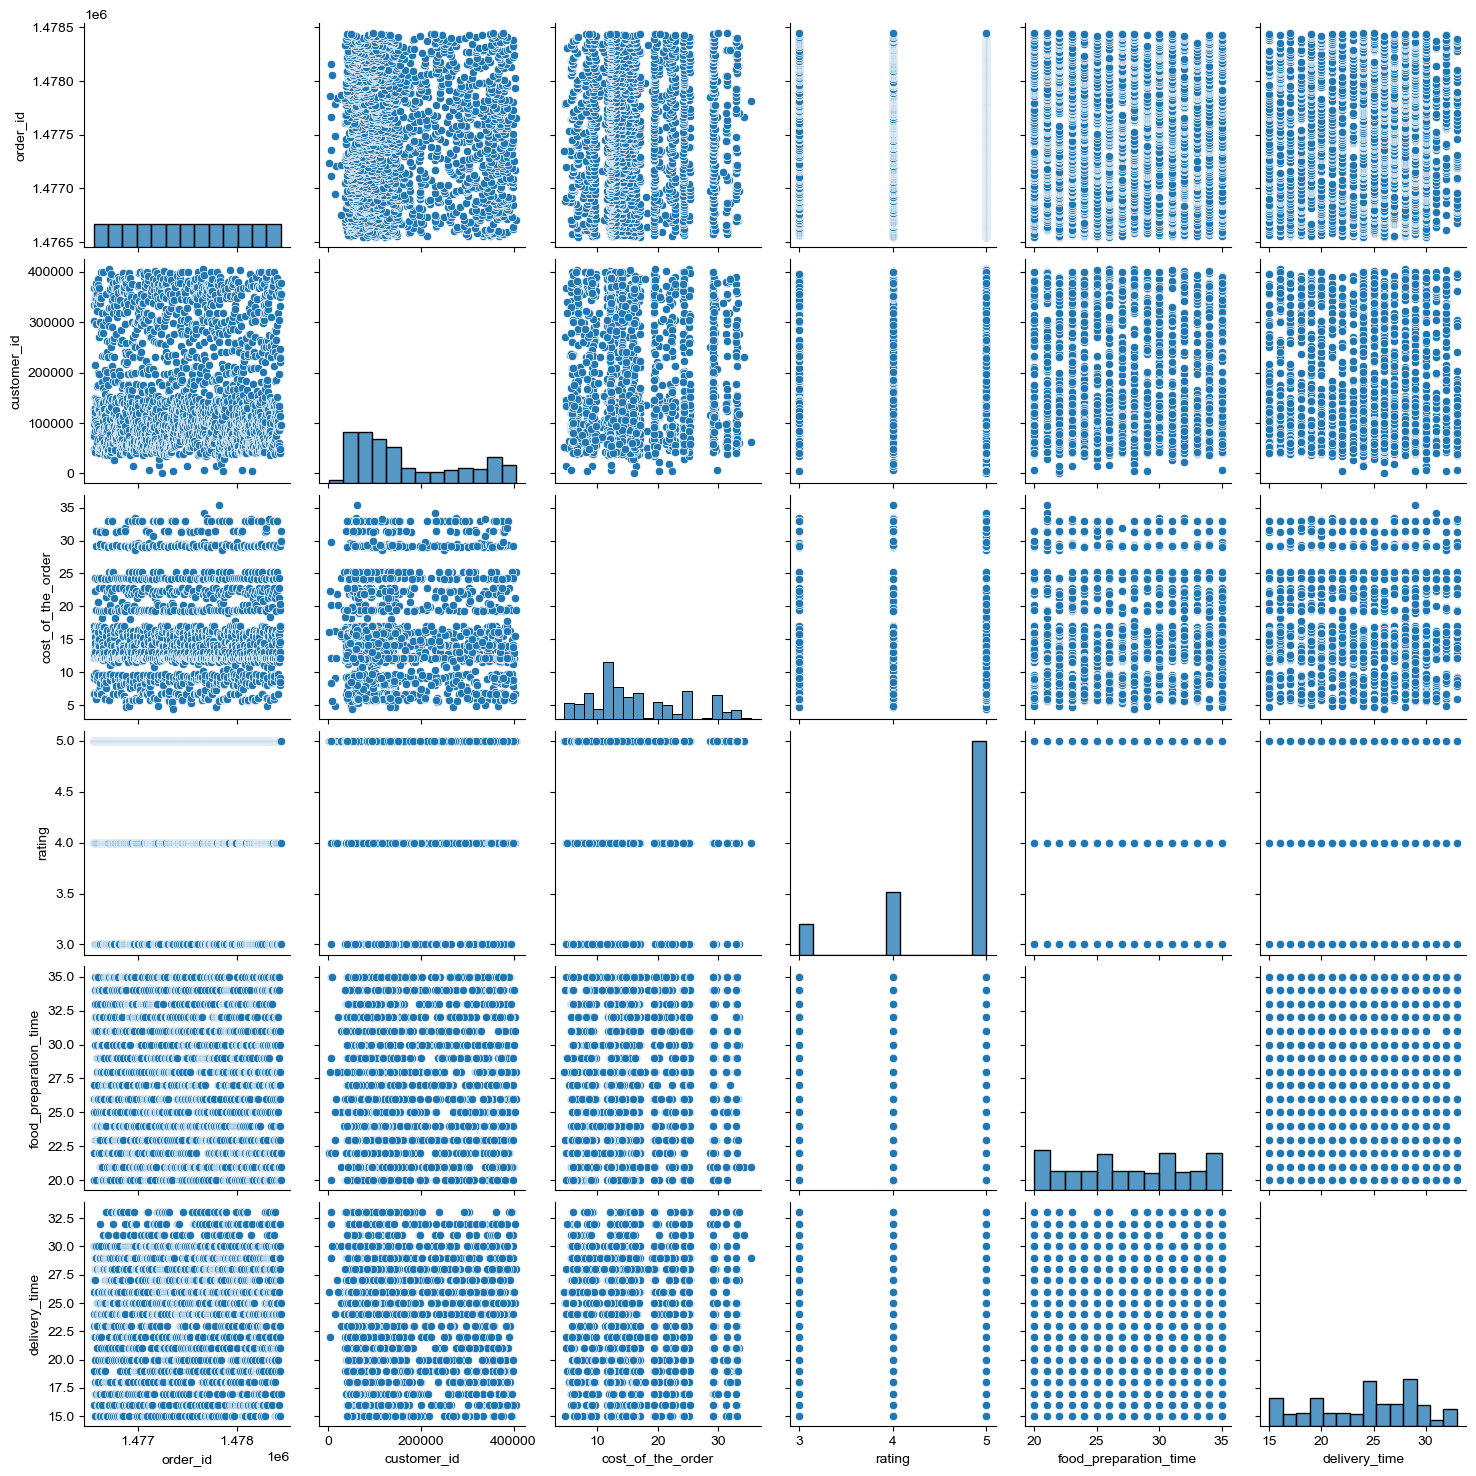

In [40]:
# Plot pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(df1)
plt.show()

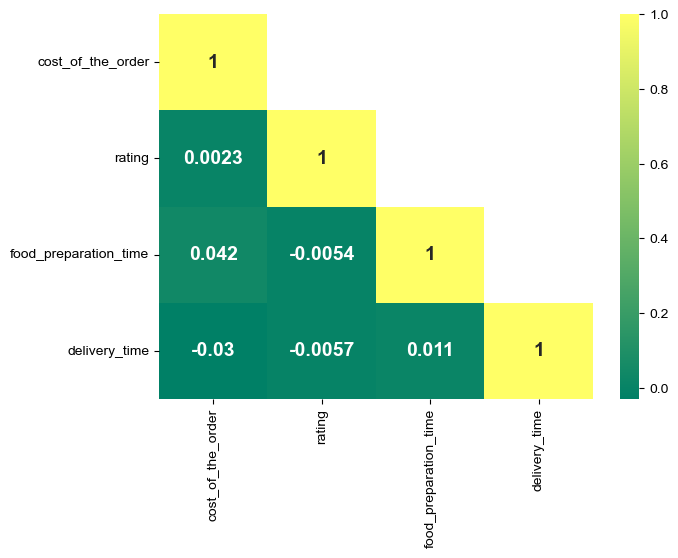

In [41]:
# Plot correlation heatmap
num_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(7, 5))
correl = df1[num_cols].corr() 
mask = np.triu(np.ones_like(correl, dtype=bool), k=1)
sns.heatmap(correl, annot=True, cmap = "summer", mask = mask, annot_kws={"size": 14, "weight": "bold"})
plt.gca().grid(False)
plt.show()

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- Both the pairplot and heatmap shows weak correlations between the numerical variables in the dataset.

### **Categorical and Numerical Variables**

In [42]:
num_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
cat_cols = ['cuisine_type', 'day_of_the_week']

In [43]:
cat_col=df1.select_dtypes(include=["object"]).columns
cat_col

Index(['restaurant_name', 'cuisine_type', 'day_of_the_week'], dtype='object')

In [44]:
# Define a function to generate violin plots for each combination of categorical and numerical variable
def plot_violinplot(df, x_var, y_var, title, xlabel, ylabel, offset1=0.05, offset2=0.05, figsize=(14, 8)):
    plt.figure(figsize=figsize)

    # Determine the order of groups
    order = sorted(df[x_var].unique())
    
    # Create the violin plot
    sns.violinplot(x=x_var, y=y_var, data=df, hue=x_var, width=0.6, linewidth=2,
                linecolor="darkslategrey", palette="Set3",  order=order)

    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Annotate mean and median values
    grouped = df.groupby(x_var)[y_var]
    mean_vals = grouped.mean()
    median_vals = grouped.median()

    for i, group_value in enumerate(order):
        mean_val = mean_vals.loc[group_value]
        median_val = median_vals.loc[group_value]
        if mean_val > median_val:
            plt.text(x=i+0.1, y=mean_val + offset1, s=f'{mean_val:.2f}', ha='center', va='bottom', 
                     fontweight='bold', color='mediumblue', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
            plt.text(x=i+0.1, y=median_val - offset2, s=f'{median_val:.2f}', ha='center', va='top', 
                     fontweight='bold', color='darkred', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
        else:
            plt.text(x=i+0.1, y=mean_val - offset2, s=f'{mean_val:.2f}', ha='center', va='top', 
                     fontweight='bold', color='mediumblue', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
            plt.text(x=i+0.1, y=median_val + offset1, s=f'{median_val:.2f}', ha='center', va='bottom', 
                     fontweight='bold', color='darkred', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

    mean_line = mlines.Line2D([], [], color='mediumblue', marker='_', linestyle=':', linewidth=2, label='Mean')
    median_line = mlines.Line2D([], [], color='darkred', marker='_', linestyle='-', linewidth=2, label='Median')
    plt.legend(handles=[mean_line, median_line], fontsize=10)

    plt.show()

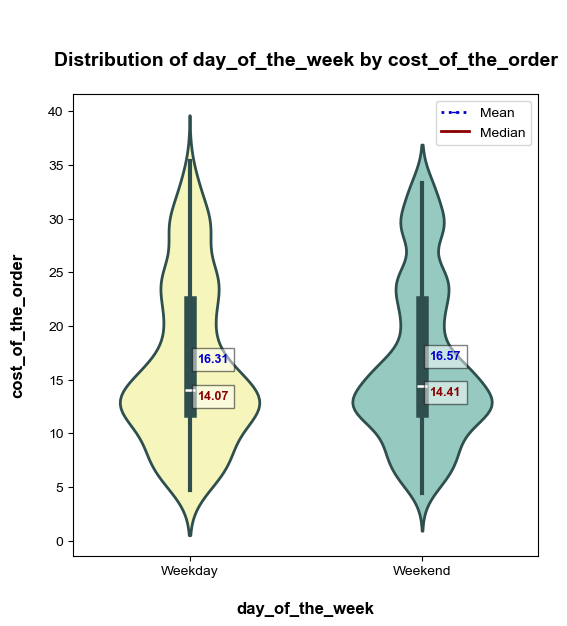

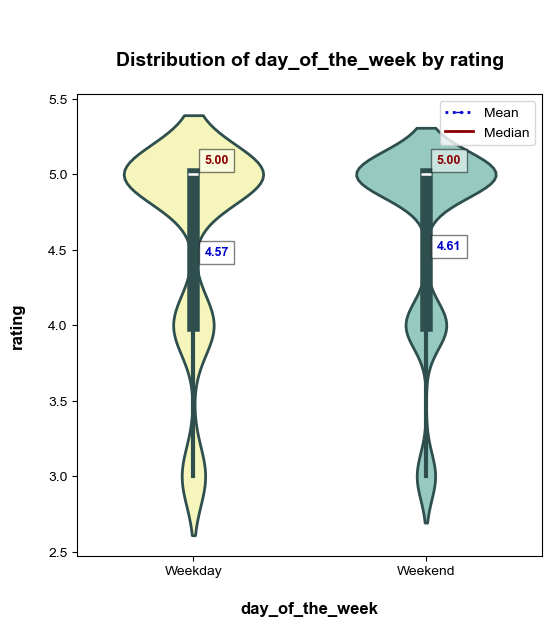

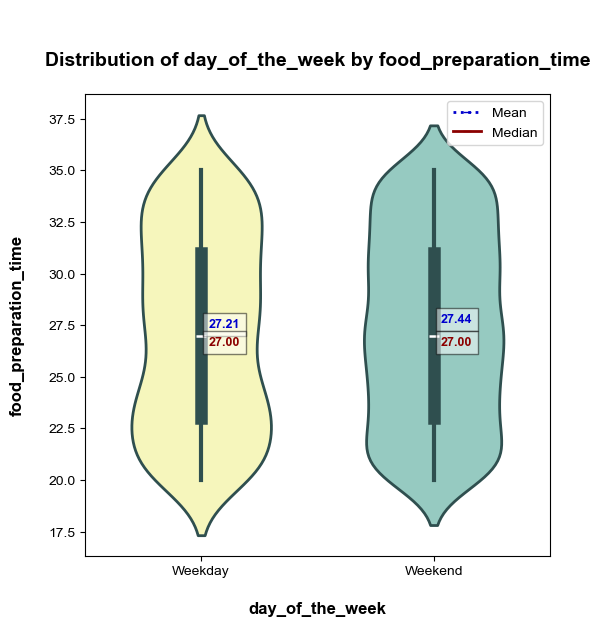

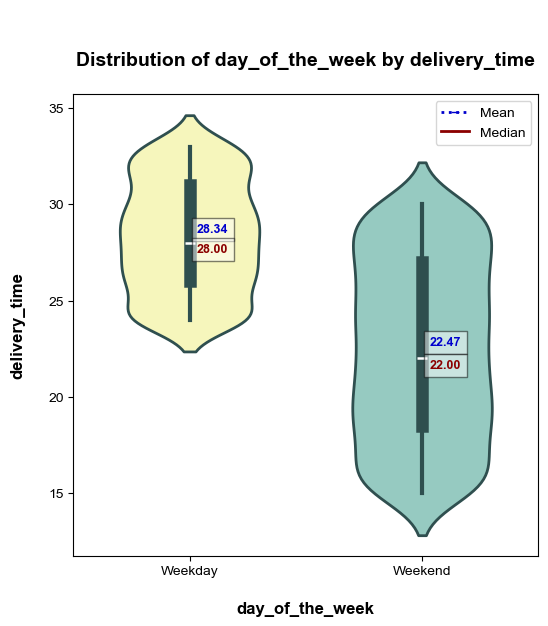

In [45]:
num_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
for num_col in num_cols:
    plot_violinplot(df1, 'day_of_the_week', num_col, title=f'\n\nDistribution of day_of_the_week by {num_col}\n', xlabel="\nday_of_the_week", 
                    ylabel=f"{num_col}\n", offset1=0.05, offset2=0.05, figsize=(6, 6))

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The ranking of cuisine is consistent for both weekdays and weekend i.e. not impacted by the day of the week.
- Both cost and food preparation time are not impacted by the day of the week.
- The delivery time is longer during the weekdays as compared to weekends. This could be caused by the availability of delivery persons during the weekdays (supply vs demand). The average delivery time during the weekdays is 28 mins and 22.5 mins during the weekends

In [46]:
def plot_violinplot2(df, x_var, y_var, title, xlabel, ylabel, offset1=0.05, offset2=0.05, figsize=(14, 8)):
    plt.figure(figsize=figsize)
    medianprops = dict(linestyle='-', linewidth=2, color='darkred')
    meanprops = dict(linestyle=':', linewidth=2, color='mediumblue')
    flierprops = dict(marker='o', markerfacecolor='coral', markersize=6, markeredgecolor='red')

    # Determine the order of groups
    order = sorted(df[y_var].unique())
    
    # Create the violin plot with swapped axes
    sns.boxplot(y=y_var, x=x_var, data=df, hue=y_var, width=0.6, linewidth=2,
                linecolor="darkslategrey", showmeans=True, meanline=True, meanprops=meanprops, 
                medianprops=medianprops, flierprops=flierprops, palette="Set3", order=order)

    plt.title(title, fontsize=14, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")  # Swapped ylabel and xlabel
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.yticks(fontsize=10)  # Adjusted for swapped axes
    plt.xticks(fontsize=10)
    
    # Annotate mean and median values
    grouped = df.groupby(y_var)[x_var]  # Swapped grouping
    mean_vals = grouped.mean()
    median_vals = grouped.median()

    for i, group_value in enumerate(order):
        mean_val = mean_vals.loc[group_value]
        median_val = median_vals.loc[group_value]
        if mean_val > median_val:
            plt.text(y=i-offset1, x=mean_val, s=f'{mean_val:.2f}', ha='center', va='bottom', 
                     fontweight='bold', color='mediumblue', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
            plt.text(y=i+offset2, x=median_val, s=f'{median_val:.2f}', ha='center', va='top', 
                     fontweight='bold', color='darkred', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
        else:
            plt.text(y=i+offset2, x=mean_val, s=f'{mean_val:.2f}', ha='center', va='top', 
                     fontweight='bold', color='mediumblue', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
            plt.text(y=i-offset1, x=median_val, s=f'{median_val:.2f}', ha='center', va='bottom', 
                     fontweight='bold', color='darkred', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

    mean_line = mlines.Line2D([], [], color='mediumblue', marker='_', linestyle=':', linewidth=2, label='Mean')
    median_line = mlines.Line2D([], [], color='darkred', marker='_', linestyle='-', linewidth=2, label='Median')
    plt.legend(handles=[mean_line, median_line], fontsize=10)

    plt.show()

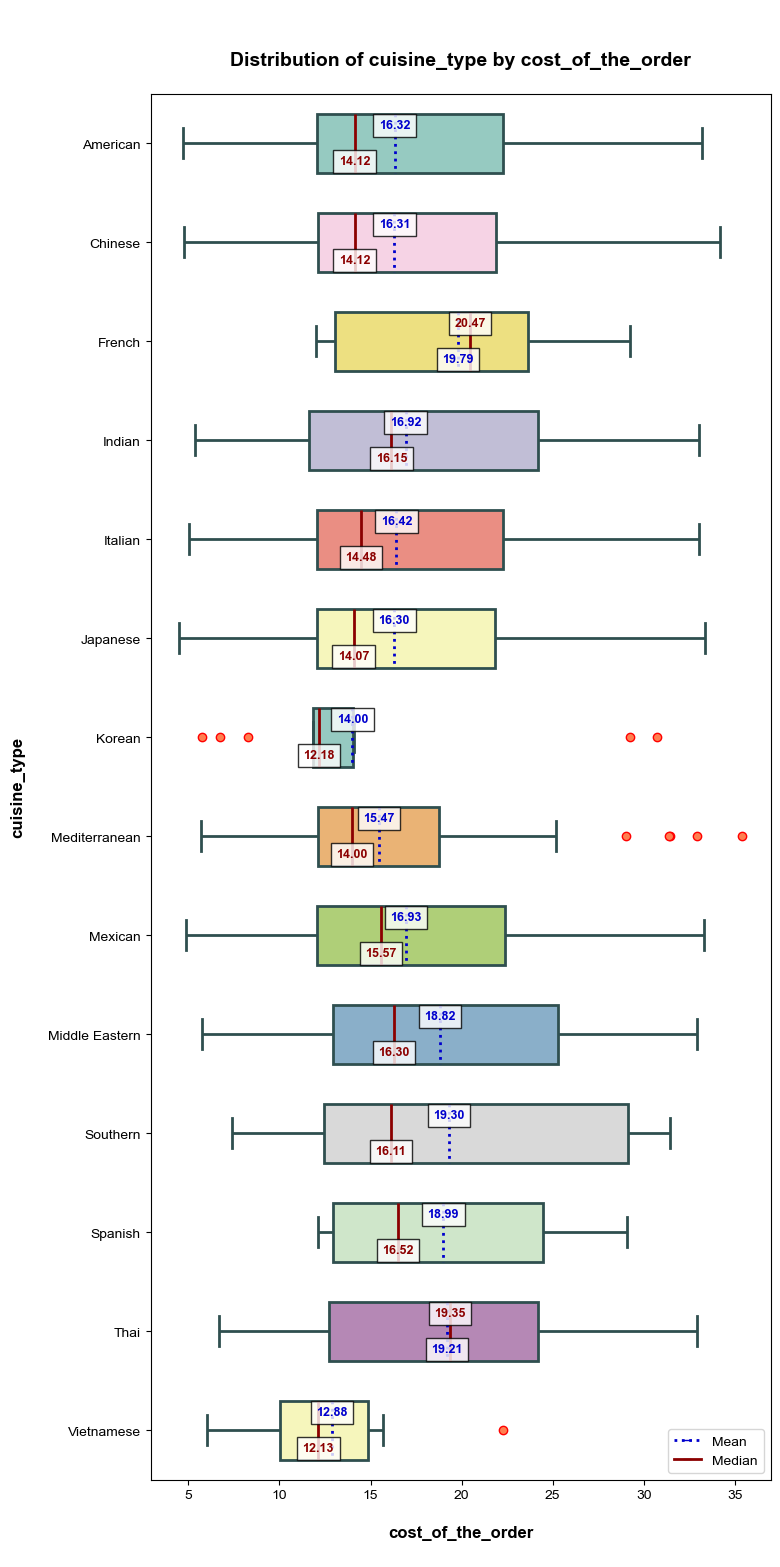

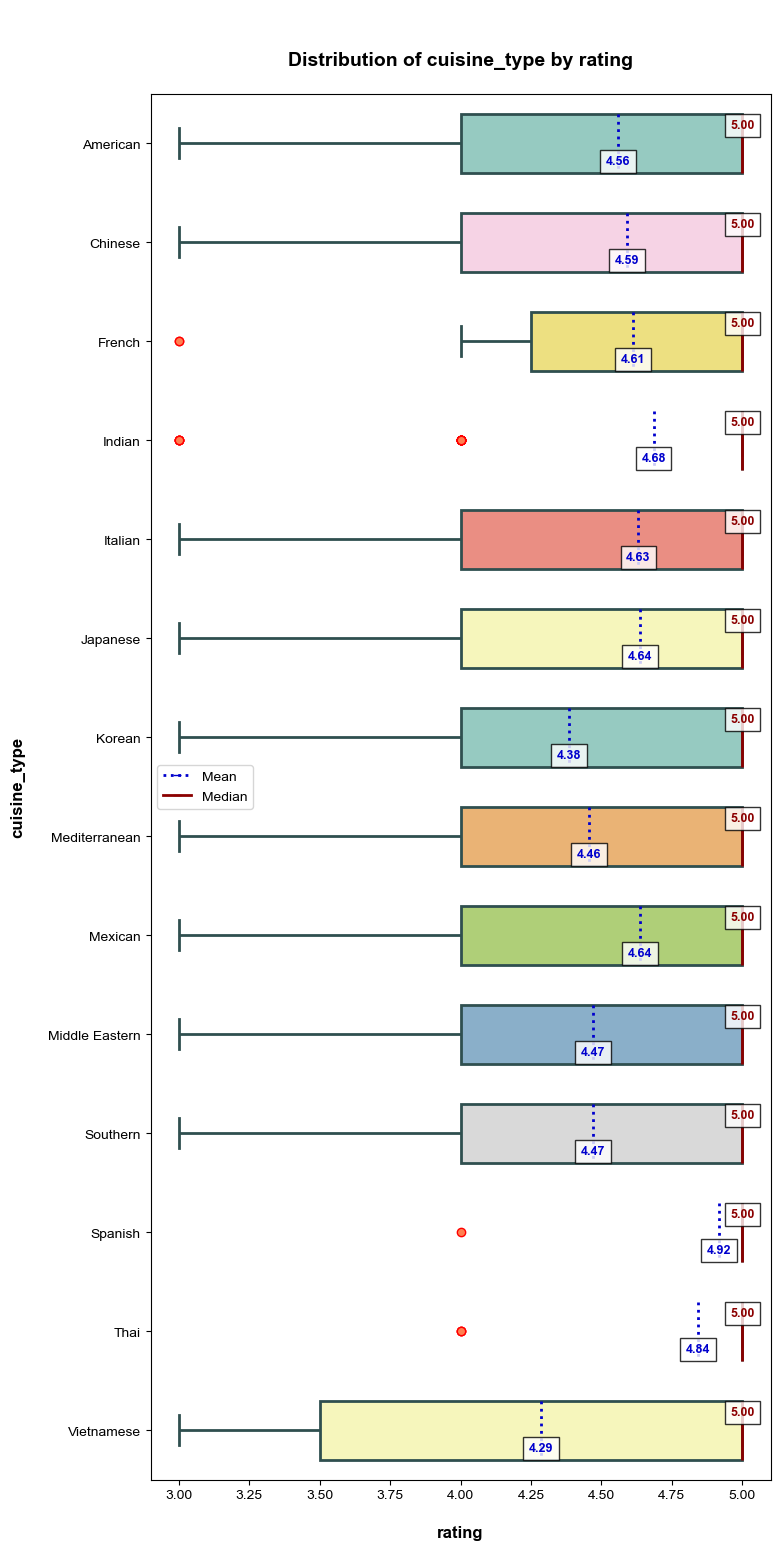

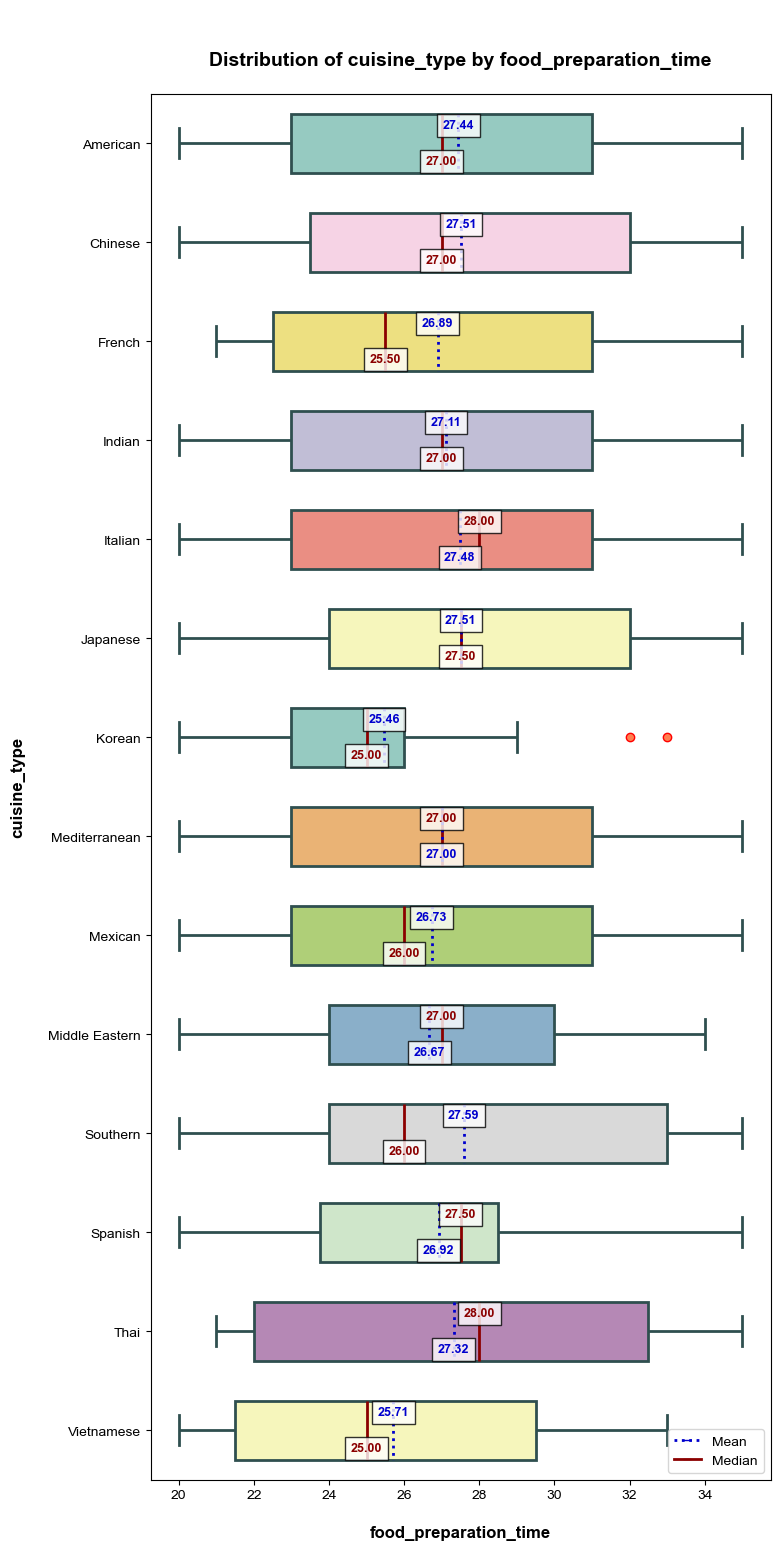

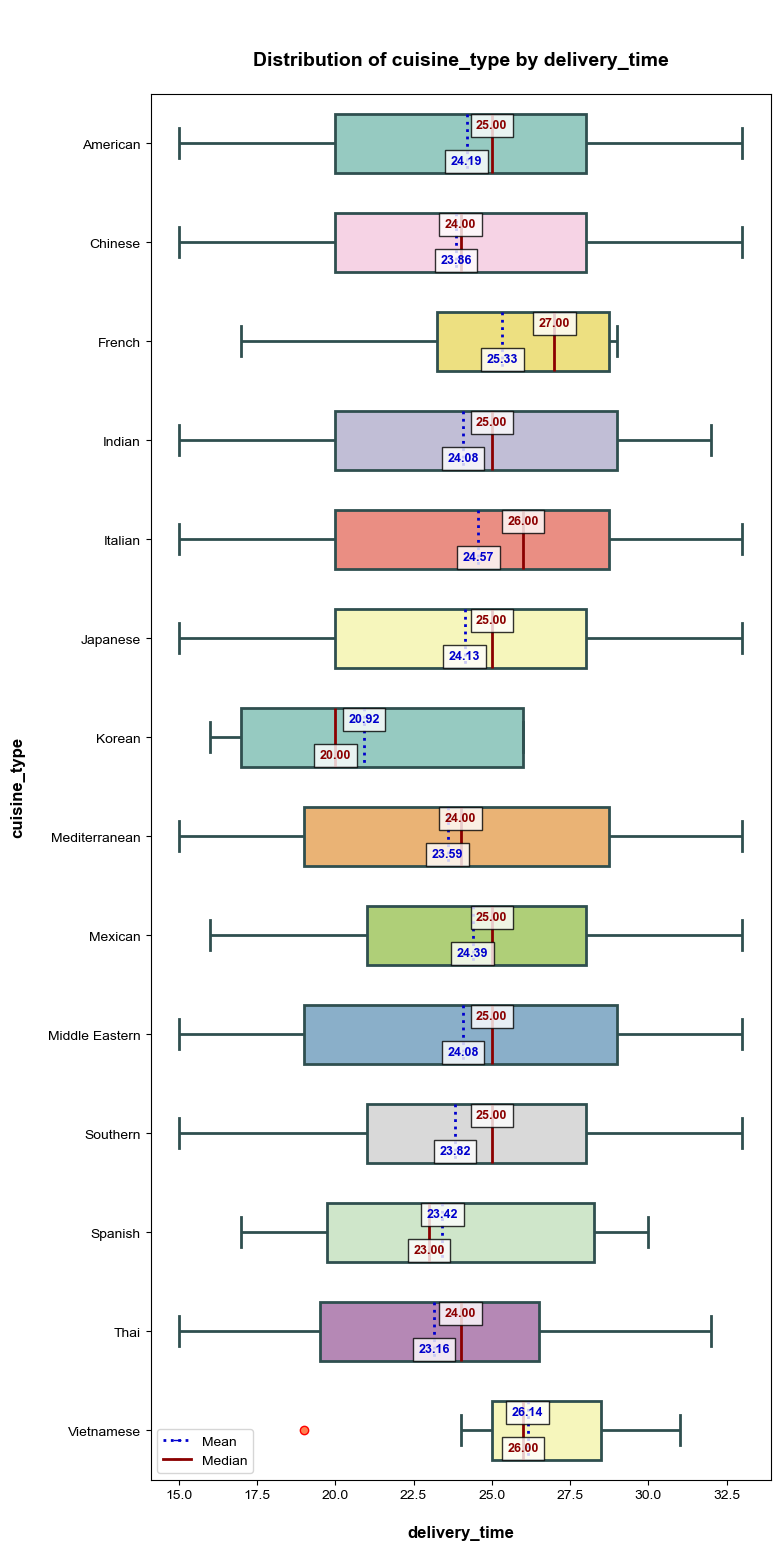

In [47]:
num_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
for num_col in num_cols:
    plot_violinplot2(df1, num_col, 'cuisine_type', title=f'\n\nDistribution of cuisine_type by {num_col}\n', ylabel="cuisine_type\n", 
                    xlabel=f"\n{num_col}\n", offset1=0.12, offset2=0.12, figsize=(8, 18))

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The ranking of cuisine is consistent for both weekdays and weekend i.e. not impacted by the day of the week.
- The cost distribution for most of the cuisines have a wide range of cost and are skewed. Korean, Vietnamese and Mediterranean cuisine have outliers.
- Not much useful information can be deduced between cuisine type, food preparation and delivery time

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 13 :  The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. </strong></span>

In [48]:
# Count no. of unique restaurant name
print(f'Total number of restaurants is {df1["restaurant_name"].nunique()}.')

# Drop columns with rating = "Not given"
df_rating = df[df["rating"] != "Not given"]

# Count no. of unique restaurant name
print(f'Total number of restaurants with ratings is {df_rating["restaurant_name"].nunique()}.')

Total number of restaurants is 178.
Total number of restaurants with ratings is 156.


In [49]:
# Convert rating to numeric
df_rating["rating"] = pd.to_numeric(df_rating["rating"])

# Compute the count and mean rating for each restaurant
restaurant_ratings = df_rating.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter count>50 and mean>4 
filtered_restaurants = restaurant_ratings[(restaurant_ratings["count"] > 50) & (restaurant_ratings["mean"] > 4)]
filtered_restaurants.reset_index().style.set_table_styles(s)

,restaurant_name,count,mean
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The restaurants fulfilling the criteria to get the promotional offer are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 14 :  The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.</strong></span>

In [50]:
# Define a function to compute the charges
def calculate_charge(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

In [51]:
# Apply the function to the data
df1['charge'] = df1['cost_of_the_order'].apply(calculate_charge)
df1.head().style.set_table_styles(s)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charge
0,1476547,83095,Bareburger,American,6.840000,Weekend,5.000000,22,24,1.026000
1,1476548,122609,Blue Ribbon Sushi,Japanese,6.840000,Weekend,4.000000,20,30,1.026000
2,1476549,75169,Tamarind TriBeCa,Indian,6.740000,Weekend,5.000000,25,26,1.011000
3,1476550,101347,The Loop,Japanese,16.980000,Weekend,5.000000,26,27,2.547000
4,1476551,49034,The Smile,American,12.180000,Weekend,5.000000,22,27,1.827000


In [52]:
# Find the total revenue
total_revenue = df1["charge"].sum()
total_revenue

6166.303

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The net revenue generated by the company across all orders is 6166.30 dollars.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 15 :  The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered).</strong></span>

In [53]:
# Compute the total time required to prepare and deliver the food
df1["total_time"] = df1["delivery_time"] + df1["food_preparation_time"]
df1.head().style.set_table_styles(s)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charge,total_time
0,1476547,83095,Bareburger,American,6.840000,Weekend,5.000000,22,24,1.026000,46
1,1476548,122609,Blue Ribbon Sushi,Japanese,6.840000,Weekend,4.000000,20,30,1.026000,50
2,1476549,75169,Tamarind TriBeCa,Indian,6.740000,Weekend,5.000000,25,26,1.011000,51
3,1476550,101347,The Loop,Japanese,16.980000,Weekend,5.000000,26,27,2.547000,53
4,1476551,49034,The Smile,American,12.180000,Weekend,5.000000,22,27,1.827000,49


In [54]:
# Number of orders > 60 mins to prepare and deliver
orders_ge60 = df1[df1["total_time"] > 60].value_counts("order_id").sum()
print(f"The total number of orders that took more than 60 mins to prepare and deliver is {orders_ge60}")

The total number of orders that took more than 60 mins to prepare and deliver is 200


In [55]:
# Percentage of orders > 60 mins to prepare and deliver
orders_ge60_pc = orders_ge60*100 / len(df1)
orders_ge60_pc

10.53740779768177

<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The percentage of orders with more than 60 minutes to get delivered from the time the order is placed is 10.54%.

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 16 :  The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?</strong></span>

In [56]:
# Compute the mean delivery time during weekdays and weekends
weekday_avg_delt = df_weekday["delivery_time"].mean()
weekend_avg_delt = df_weekend["delivery_time"].mean()
print(f"The mean delivery time during weekdays is {weekday_avg_delt.round(2)} mins")
print(f"The mean delivery time during weekends is {weekend_avg_delt.round(2)} mins")

The mean delivery time during weekdays is 28.34 mins
The mean delivery time during weekends is 22.47 mins


<div style="background-color: aliceblue; font-family: roboto; font-size: 11pt; padding: 10px; border-radius: 5px;">
    <span style="display : inline-block; background-color : steelblue; padding : 5pt; font-family: roboto black; font-size: 16pt; color: white;">Observations</span><p>

- The average delivery time during the weekdays is 28 mins and 22 mins during the weekends. This is most likely caused by the availability of delivery persons during the weekdays since the order count during weekdays is much lower than weekend (demand vs supply).

<span style="display : inline-block; background-color : maroon; padding : 5pt; font-family: roboto; font-size: 13pt; color: white;"><strong>Question 17 :  What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations).</strong></span>

## **Conclusions**<br>
- The total number of orders used in this analysis is 1,898, with Order ID ranged from #1476547 to #1478444.<br><br>

- Of the 1,898 orders, 736 (38.78%) are un-rated.<br><br>

- For the rated orders, half (50.6%) of them receives the maximum rating of 5 and one-third (33.4%) of them has a rating of 4. This may have suggested that only satisfied customers are making the effort to rate their orders, there is bias in the rating data.<br><br>

- The analysis on the cost of order has suggested a bimodal distribution as there are multiple peaks, with the highest being around 13 dollars and two slight peaks at around 24 and 30 dollars. The students are likely to be the reason behind the highest peak and the working professionals (having higher spending power) are probably the cause for the other two peaks.<br><br>

- In terms of cuisine, American is the most popular choice, with a total of 584 orders (30.8%). followed by Japanese [470, 24.8%] and Italian [298, 15.7%]. This observation is true and consistent for both weekdays and weekend orders.<br><br>

- There are more food orders made during the weekends (71%) than during the weekends (29%).<br><br>

- Both the cost and food preparation time are not impacted by the day of the week. However, the delivery time is longer during the weekdays as compared to the weekend. This could be caused by the availability of delivery persons during the weekdays (due to demand and supply). The average delivery time during the weekdays is 28 mins and 22 mins during the weekends.<br><br>

## **Recommendations**

- Rating scales should be numeric. This will result in data that is easy to use for statistical analysis. Having 1 to 5 rating scale is a simple and effective way to understand how the customers feel about the food that they have ordered as well as the services provided to them. It is easy to understand and is a quick way for the customers to provide their responses. This may also increase the survey response rate, and providing more data to assess and enhance quality and service standards.<br><br>

- Explore strategies such as promotions, discounts to improve and boost weekday sales.<br><br>

- Review and understand the root cause behind the difference in delivery lead time between the weekdays and weekend. This could be due to the low demand for weekday orders, which will have to be addressed if there is intention to increase weekdays' sales.<br><br>

- The criteria for the promotional advertisement offer only resulted in 4 eligible restaurants (out of 178). Consider revising and loosening the criteria, providing more opportunities for other restaurants to enjoy the benefits. This may entice continued collaboration with the existing restaurants and to attract partnership with new restaurants.